Python Packages

In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Scipy Packages

In [2]:
import scipy.stats as ss
from collections import Counter

<b>PROBLEM</b>

* The problem in investing on a company is that sometimes the company doesn’t deliver what it is promised, ending up in wasting investor’s capital.

<b>GOAL</b>

* To create a model that can be used both by investors and individuals alike who are interested in either backing up a single product or investing a huge sum of capital on companies listed in Kickstarter by predicting the chances of success based on Kickstarter data.


In [3]:
df = pd.read_csv('2state.csv',index_col=0)

In [4]:
df

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,time_avail
ID,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11,failed,0,GB,0.0,1533.95,58
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02,failed,15,US,2421.0,30000.00,59
1000004038,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12,failed,3,US,220.0,45000.00,44
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17,failed,1,US,1.0,5000.00,29
1000014025,Monarch Espresso Bar,Restaurants,Food,2016-04-01,2016-02-26,successful,224,US,52375.0,50000.00,34
...,...,...,...,...,...,...,...,...,...,...,...
999975836,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,2017-04-19,2017-03-20,failed,4,US,154.0,6500.00,29
999977640,The Tribe,Narrative Film,Film & Video,2011-07-19,2011-06-22,failed,5,US,155.0,1500.00,26
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,2010-08-16,2010-07-01,failed,1,US,20.0,15000.00,45


CORRELATION and ASSOCIATION EVALUATION

according to the three association evaluation below, name (OBV!) and time avail almost has no association with state, category, and country<br>

CATEGORY<br>
on the category side, it has very strong association with main category which is obvious since category is basically the sub category of the main category<br>
while category itself has negligible association with name, deadline, launched, and time avail, and has zero or no association with backers and amout pledged. <br>
when seen with state and country, it has somewhat association despite it's weak strength

MAIN CATEGORY
main category easily associates with category. while main category itself has a noticable association with the state of the campaign, and weak association with USD goal real and very weak association towards usd goal real..
main category has negligible association with Name, Deadline, Launched, backers, country, and time available, and zero association with the number of money pledged.

STATE
state as our TARGET has a strong association with the number of backers and the amount of money pledged into the campaign.
while state has a moderate association with category, weak association with main category, deadline, launched, number of goals, and the time availability

COUNTRY
country has negligible association strength accross the board except for the amount of money pledged and the amount of goal set by the campaigners. this might happen due to the high number of campaigners from the US.

In [5]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

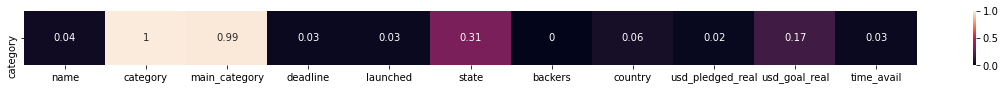

In [6]:
dfx = asosiasi_cramers_v = []
for i in list(df.columns):
    x = round((cramers_v(df['category'], df[i])),2)
    asosiasi_cramers_v.append(x)
    
data = pd.DataFrame(data=[asosiasi_cramers_v], columns=list(df.columns), index=['category'])
plt.figure(figsize=(20,1))
sns.heatmap(data, annot=True)

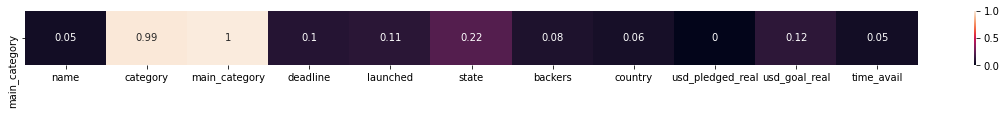

In [7]:
dfx = asosiasi_cramers_v = []
for i in list(df.columns):
    x = round((cramers_v(df['main_category'], df[i])),2)
    asosiasi_cramers_v.append(x)
    
data = pd.DataFrame(data=[asosiasi_cramers_v], columns=list(df.columns), index=['main_category'])
plt.figure(figsize=(20,1))
sns.heatmap(data, annot=True)

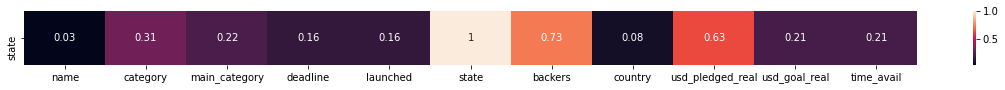

In [8]:
asosiasi_cramers_v = []
for i in list(df.columns):
    x = round((cramers_v(df['state'], df[i])),2)
    asosiasi_cramers_v.append(x)
    
data = pd.DataFrame(data=[asosiasi_cramers_v], columns=list(df.columns), index=['state'])
plt.figure(figsize=(20,1))
sns.heatmap(data, annot=True)

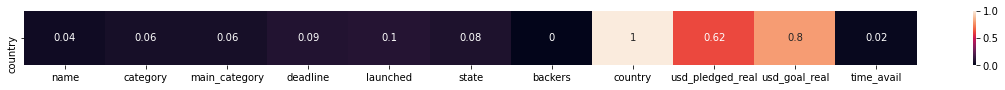

In [9]:
dfx = asosiasi_cramers_v = []
for i in list(df.columns):
    x = round((cramers_v(df['country'], df[i])),2)
    asosiasi_cramers_v.append(x)
    
data = pd.DataFrame(data=[asosiasi_cramers_v], columns=list(df.columns), index=['country'])
plt.figure(figsize=(20,1))
sns.heatmap(data, annot=True)